In [1]:
import os
if os.getcwd().endswith("test"):
    os.chdir("..")

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from utils.FrameUtils import *

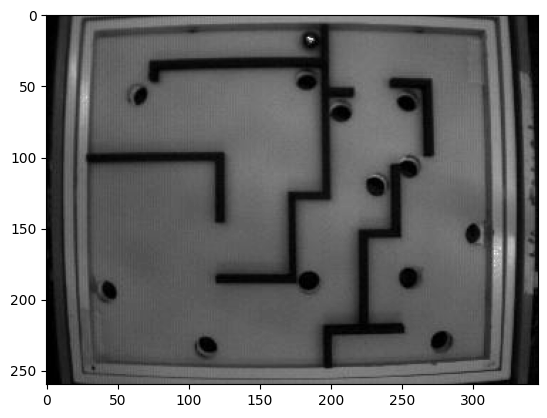

In [4]:
file = "RecordTest/img-20.jpg"
img = cv.imread(file, cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

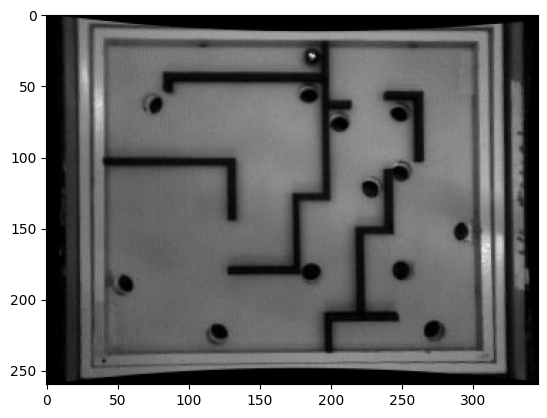

In [5]:
frame = remove_distortion(img)
plt.imshow(frame, cmap='gray')

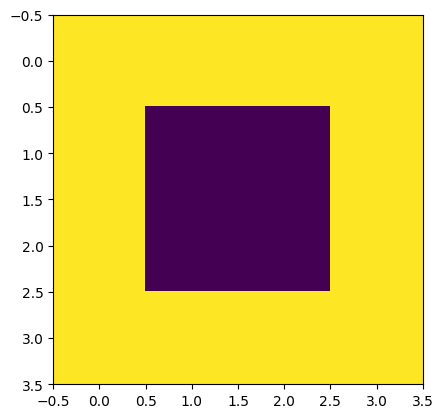

In [33]:
p_size = 4
p_size2 = p_size // 2
pattern = np.ones((p_size, p_size), dtype=np.uint8)
pattern[p_size2-1:p_size2+1, p_size2-1:p_size2+1] = 0
plt.imshow(pattern)

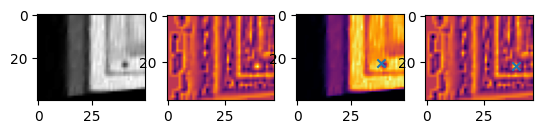

In [49]:
match_area = frame[220:, :50]
res = cv.matchTemplate(match_area, pattern, cv.TM_CCOEFF_NORMED)
pos = np.unravel_index(res.argmax(), res.shape)
fig, ax = plt.subplots(ncols=4)
ax[0].imshow(match_area, cmap='gray')
ax[1].imshow(res, cmap='inferno')
ax[2].imshow(match_area, cmap='inferno')
ax[2].scatter(pos[1], pos[0], marker='x')
ax[3].imshow(res, cmap='inferno')
ax[3].scatter(pos[1], pos[0], marker='x')

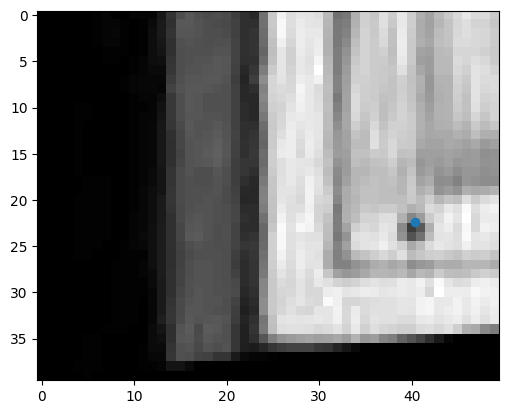

In [38]:
params = cv.SimpleBlobDetector_Params()
params.minArea = 1
detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(match_area)
xs = []
ys = []
for kp in keypoints:
    xs.append(kp.pt[0])
    ys.append(kp.pt[1])
plt.imshow(match_area, cmap='gray')
plt.scatter(xs, ys)